In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('dataset.csv',encoding='iso-8859-1')
df[:100]

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,2014,AFGHANISTAN,2675,1194,1393,74,14,0,0.08,9
1,2014,ALBANIA,1559,191,1053,16,299,0,0.54,23
2,2014,ALGERIA,39651,149,14422,20151,2856,2073,1.02,581
3,2014,ANDORRA,126,0,126,0,0,0,1.74,0
4,2014,ANGOLA,9480,0,5310,158,340,3672,0.39,509
...,...,...,...,...,...,...,...,...,...,...
95,2014,ISLAMIC REPUBLIC OF IRAN,177115,900,66662,91127,8976,9450,2.27,4218
96,2014,ISRAEL,17617,6775,6013,3930,898,0,2.22,1011
97,2014,ITALY (INCLUDING SAN MARINO),87377,13532,39265,31670,2910,0,1.46,4265
98,2014,JAMAICA,2024,75,1835,0,113,0,0.73,182


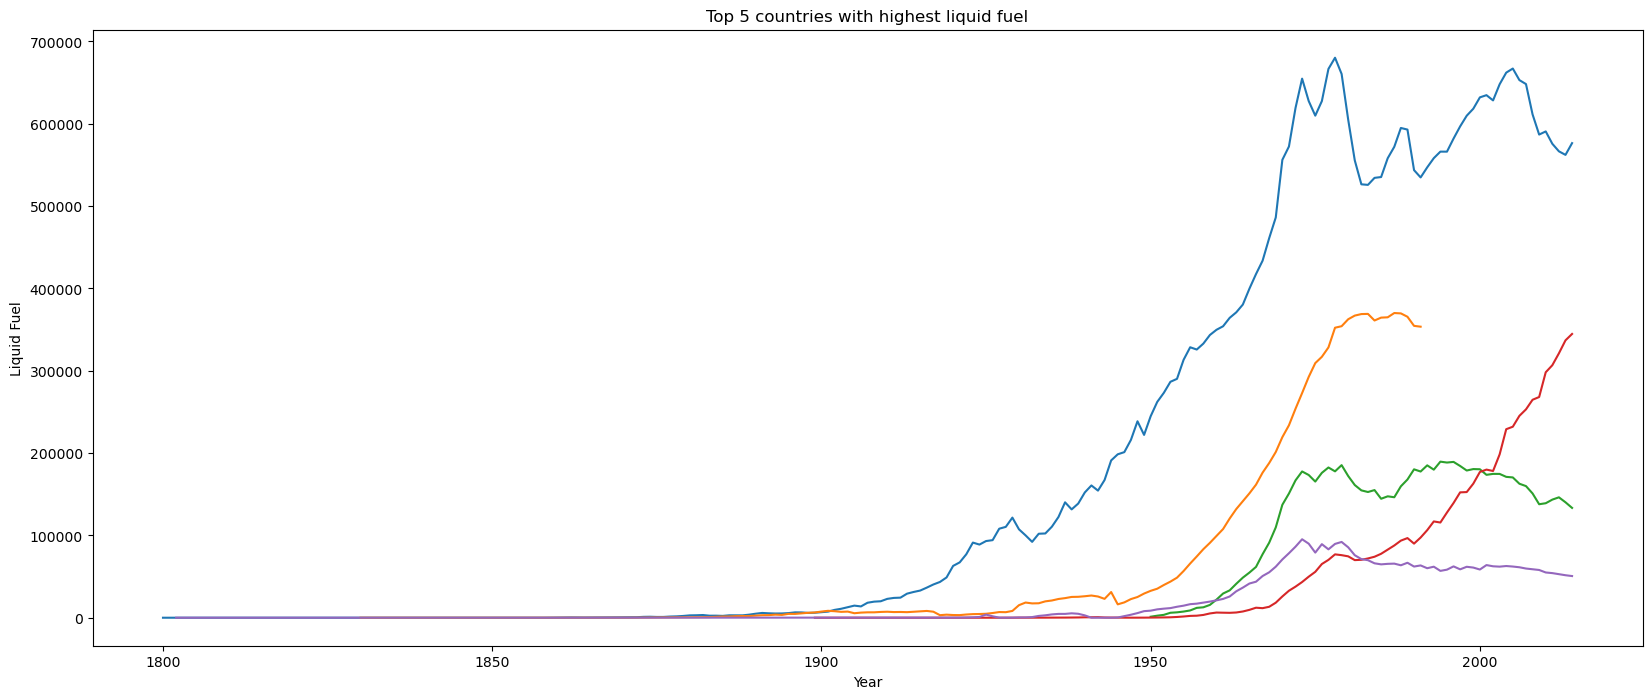

In [45]:
### the line graph shows the trend of liquid fuel over the years for the top 5 countries with the highest amount.
plt.figure(figsize=(20,8))
liquid_fuel_by_country = df.groupby('Country')["Liquid Fuel"].sum()
liquid_fuel_by_country_sorted = liquid_fuel_by_country.sort_values(ascending = False)
top_5 = liquid_fuel_by_country_sorted.head(5)
top_5_countries = top_5.index

for country in top_5_countries:
    data = df[df['Country']==country]
    plt.plot(data["Year"], data["Liquid Fuel"])
    plt.title("Top 5 countries with highest liquid fuel")
    plt.xlabel("Year")
    plt.ylabel("Liquid Fuel")

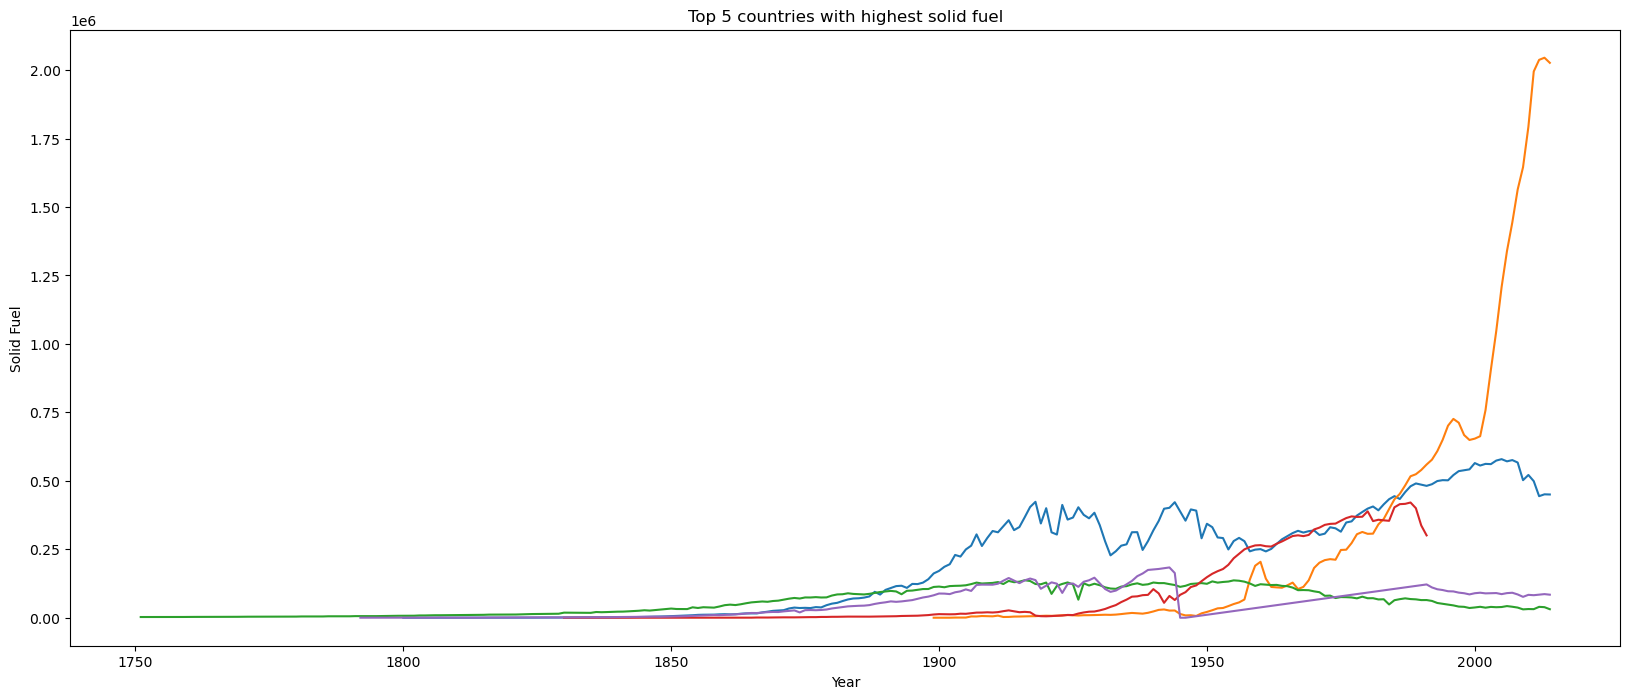

In [46]:
### the line graph shows the trend of solid fuel over the years for the top 5 countries with the highest amount.
plt.figure(figsize=(20,8))
solid_fuel_by_country = df.groupby('Country')["Solid Fuel"].sum()
solid_fuel_by_country_sorted = solid_fuel_by_country.sort_values(ascending = False)
top_5 = solid_fuel_by_country_sorted.head(5)
top_5_countries = top_5.index

for country in top_5_countries:
    data = df[df['Country']==country]
    plt.plot(data["Year"], data["Solid Fuel"])
    plt.title("Top 5 countries with highest solid fuel")
    plt.xlabel("Year")
    plt.ylabel("Solid Fuel")

Text(0, 0.5, 'fuel')

<Figure size 2000x800 with 0 Axes>

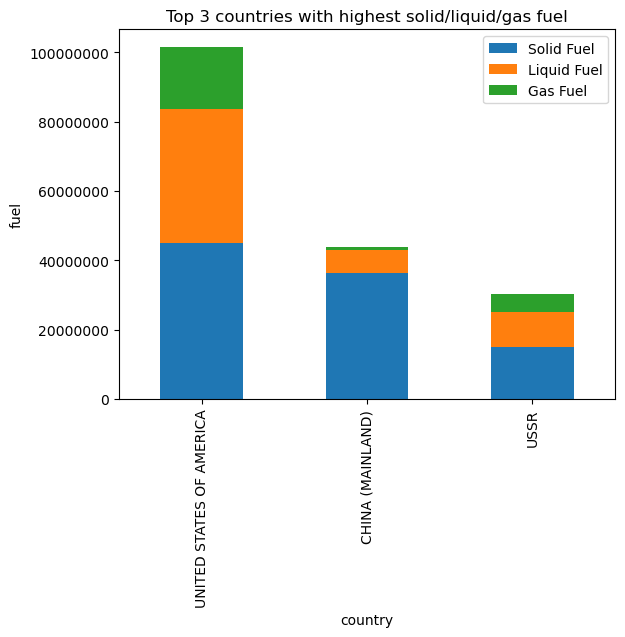

In [47]:
### the stacked bar graph shows the top 3 countries with highest solid/liquid/gas fuel and how much of each fuel.
plt.figure(figsize=(20,8))
fuel_by_country = df.groupby('Country')[["Solid Fuel", "Liquid Fuel", "Gas Fuel"]].sum()
fuel = fuel_by_country.sum(axis=1)
fuel_by_country_sorted = fuel.sort_values(ascending = False)
top_3 = fuel_by_country_sorted.head(3)
fuel_data = fuel_by_country.loc[top_3.index]
fuel_data.plot(kind = "bar", stacked=True)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title("Top 3 countries with highest solid/liquid/gas fuel")
plt.xlabel("country")
plt.ylabel("fuel")